In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("../../../machine_learning_tools/")

In [3]:
import pandas as pd
pd.set_option("display.max_colwidth",1000)

In [4]:
import matplotlib.pyplot as plt

In [5]:
import visualizations_ml as vml
import sklearn_models as sklm

# Generate Synthetic Data

In [6]:
"""
Purpose: to generate synthetic data to practice applying differnt kernels

Pseudocode; 
1) Define a grid of points to be classified
2) Define a function that will be the boundary for the data
3) Define a ethod that will take the boundary and assign a class label 
4) Have a property that perturbs a certain number of random labels

"""

'\nPurpose: to generate synthetic data to practice applying differnt kernels\n\nPseudocode; \n1) Define a grid of points to be classified\n2) Define a function that will be the boundary for the data\n3) Define a ethod that will take the boundary and assign a class label \n4) Have a property that perturbs a certain number of random labels\n\n'

# Creating the sinusoid seperated data

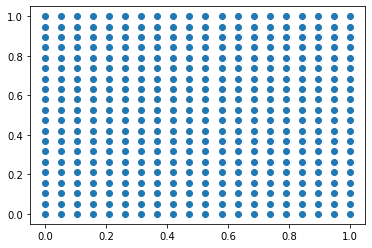

In [7]:
#creating the sinusoid data points
import numpy as np
n_x1 = 20
n_x2 = 20
x1 = np.linspace(0,1,n_x1)
x2 = np.linspace(0,1,n_x2)
xx1,xx2 = np.meshgrid(x1,x2)
plt.scatter(xx1,xx2)

In [8]:
colors = np.array(["red","blue"])

# Dataset 1: Wave

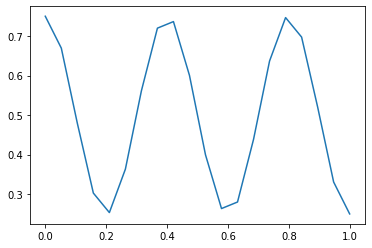

In [9]:
# Step 2:Define a function that will be the boundary for the data 
from numpy import cos, pi

x = np.linspace(0,1,len(x1))
y = 0.25*np.cos(5*pi*x) + 0.5
plt.plot(x,y)

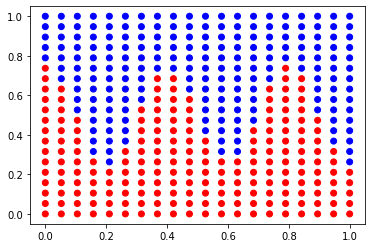

In [10]:
# Creating the data vector
class_mask_2 = np.where(xx2 <= y)

y_wave = np.ones(xx1.shape).astype('int')
y_wave[class_mask_2] = 0
X_wave = np.vstack([xx1.ravel(),xx2.ravel()]).T
y_wave = y_wave.ravel()


fig,ax = plt.subplots(1,1)
ax.scatter(X_wave[:,0],X_wave[:,1],c = colors[y_wave])

# Creating the Circles Dataset

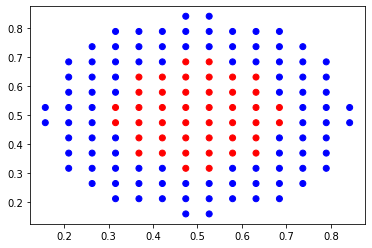

In [11]:
y_circles = np.ones(xx1.shape).astype('int')

inner_radius = 0.2
inner_cicle_mask = np.where(((xx1-0.5)**2 + (xx2-0.5)**2)<=(inner_radius**2))
outer_crop = np.where(((xx1-0.5)**2 + (xx2-0.5)**2)<=(0.35**2))

y_circles[inner_cicle_mask] = 0
y_circles = y_circles[outer_crop].ravel()

X_circles = np.vstack([xx1[outer_crop].ravel(),xx2[outer_crop].ravel()]).T

fig,ax = plt.subplots(1,1)
ax.scatter(X_circles[:,0],X_circles[:,1],c = colors[y_circles])

# Creating the half circle dataset

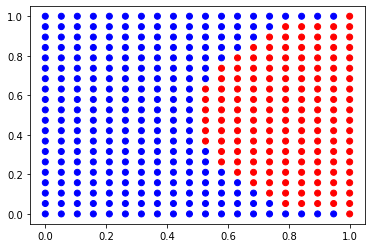

In [12]:
y_dome = np.ones(xx1.shape).astype('int')

inner_radius = 0.5
inner_cicle_mask = np.where(((xx1-1)**2 + (xx2-0.5)**2)<=(inner_radius**2))

y_dome[inner_cicle_mask] = 0
y_dome = y_dome.ravel()

X_dome = np.vstack([xx1.ravel(),xx2.ravel()]).T

fig,ax = plt.subplots(1,1)
ax.scatter(X_dome[:,0],X_dome[:,1],c = colors[y_dome])

# Trying the Different Kernel methods on the datasets

In [13]:
"""
Purpose: To test the ability of a kernel SVM to form a decision boundary that
matches the data boundaries

Pseudocode: 

For a list of certain svm kernel methods
1) Create the classifier (with certain parameters)
2) Train the classifier 
3) Plot the decision boundary
4) Measure the training accuracy

"""

'\nPurpose: To test the ability of a kernel SVM to form a decision boundary that\nmatches the data boundaries\n\nPseudocode: \n\nFor a list of certain svm kernel methods\n1) Create the classifier (with certain parameters)\n2) Train the classifier \n3) Plot the decision boundary\n4) Measure the training accuracy\n\n'

In [14]:
from sklearn.svm import SVC

In [19]:
possible_kernels = [
dict(kernel = "linear"),
dict(kernel = "poly",
    kwargs = dict(degree = 2)),
dict(kernel = "poly",
    kwargs = dict(degree = 3)),
dict(kernel = "poly",
    kwargs = dict(degree = 5)),
dict(kernel = "poly",
    kwargs = dict(degree = 7,
                 C = 1000)),
# dict(kernel = "poly",
#     kwargs = dict(degree = 9)),
dict(kernel = "rbf",
    kwargs = dict(gamma = 2)),
dict(kernel = "rbf",
    kwargs = dict(gamma = 10)),
dict(kernel = "rbf",
    kwargs = dict(gamma = 20)),
    
dict(kernel = "sigmoid",
    kwargs = dict(gamma = 2)),
dict(kernel = "sigmoid",
    kwargs = dict(gamma = 10)),
dict(kernel = "sigmoid",
    kwargs = dict(gamma = 20)),
    
]

def test_kernel_performance(X,y,possible_kernels=possible_kernels):
    for k in possible_kernels:
    #k = possible_kernels[0]
        kw = k.get("kwargs",dict())
        model = sklm.SVC(kernel = k["kernel"],
                         **kw)
        model.fit(X,y)

        print(f"\nFor model = {k['kernel']} with param: {kw}")
        print(f"Training Accuracy = {model.score(X,y)}")
        vml.plot_svm_kernels(
            model,
            X,
            y,
            #title = k["kernel"]
        )


For model = linear with param: {}
Training Accuracy = 0.8425


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


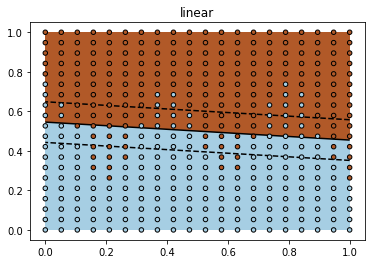


For model = poly with param: {'degree': 2}
Training Accuracy = 0.8475


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


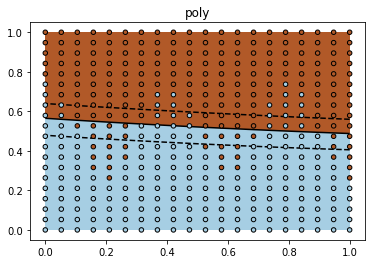


For model = poly with param: {'degree': 3}
Training Accuracy = 0.8475


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


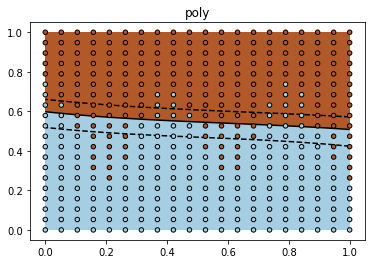


For model = poly with param: {'degree': 5}
Training Accuracy = 0.8625


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


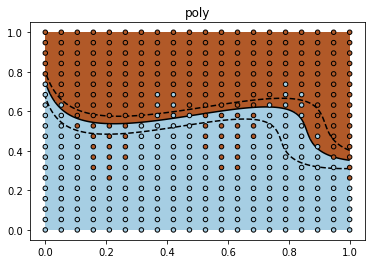


For model = poly with param: {'degree': 7, 'C': 1000}
Training Accuracy = 0.8425


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


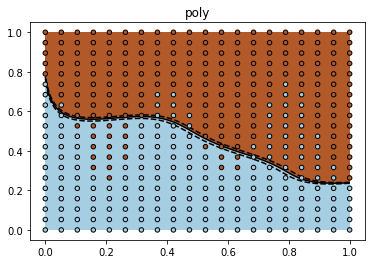


For model = rbf with param: {'gamma': 2}
Training Accuracy = 0.855


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


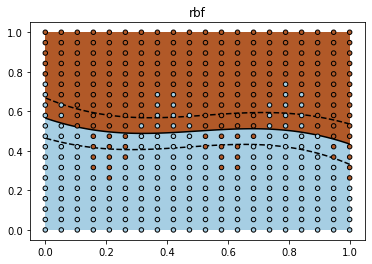


For model = rbf with param: {'gamma': 10}
Training Accuracy = 0.885


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


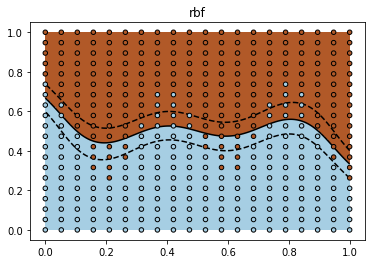


For model = rbf with param: {'gamma': 20}
Training Accuracy = 0.96


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


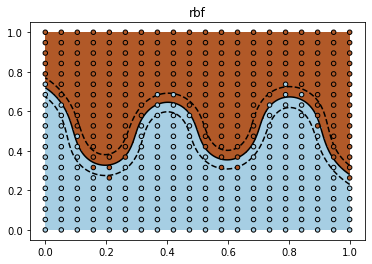


For model = sigmoid with param: {'gamma': 2}
Training Accuracy = 0.535


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


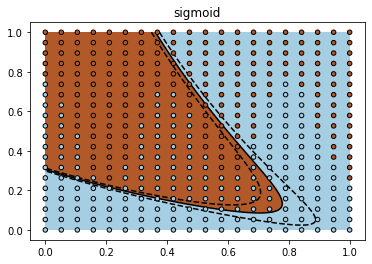


For model = sigmoid with param: {'gamma': 10}
Training Accuracy = 0.29


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


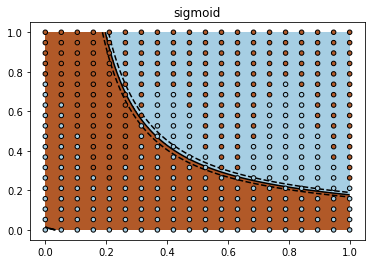


For model = sigmoid with param: {'gamma': 20}
Training Accuracy = 0.2975


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


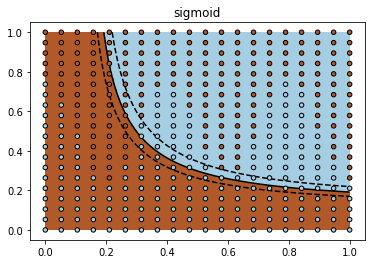

In [20]:
test_kernel_performance(
    X = X_wave,
    y = y_wave
)



For model = linear with param: {}
Training Accuracy = 0.6857142857142857


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
../../../machine_learning_tools/visualizations_ml.py:325: UserWarning: No contour levels were found within the data range.
  linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


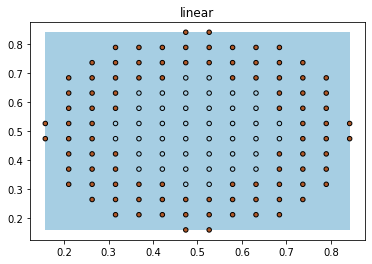


For model = poly with param: {'degree': 2}
Training Accuracy = 0.65


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


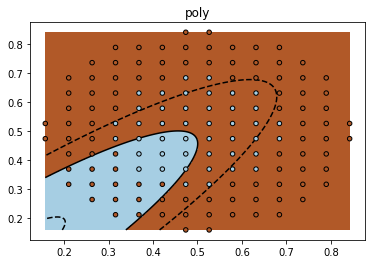


For model = poly with param: {'degree': 3}
Training Accuracy = 0.7357142857142858


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


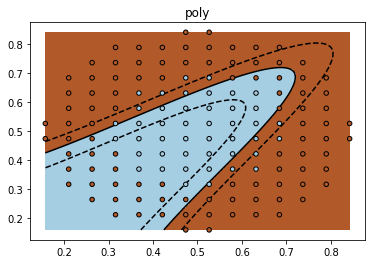


For model = poly with param: {'degree': 5}
Training Accuracy = 0.8071428571428572


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


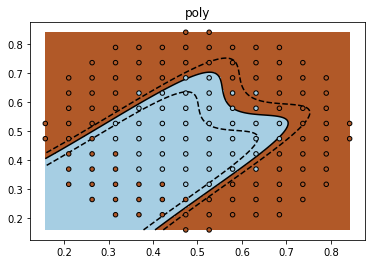


For model = poly with param: {'degree': 7}
Training Accuracy = 0.7


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


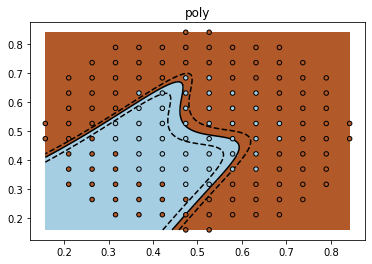


For model = rbf with param: {'gamma': 2}
Training Accuracy = 0.6857142857142857


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


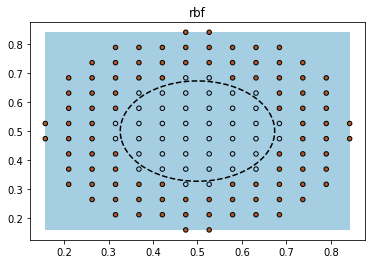


For model = rbf with param: {'gamma': 10}
Training Accuracy = 1.0


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


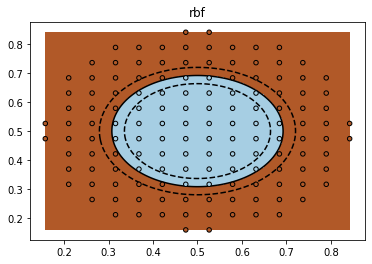

../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)



For model = rbf with param: {'gamma': 20}
Training Accuracy = 0.9142857142857143


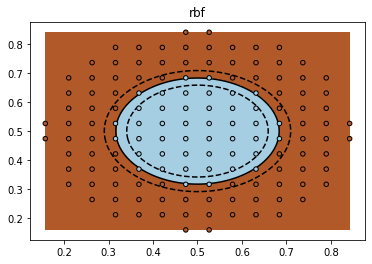


For model = sigmoid with param: {'gamma': 2}
Training Accuracy = 0.5857142857142857


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


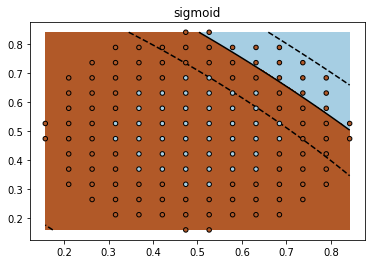


For model = sigmoid with param: {'gamma': 10}
Training Accuracy = 0.6857142857142857


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
../../../machine_learning_tools/visualizations_ml.py:325: UserWarning: No contour levels were found within the data range.
  linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


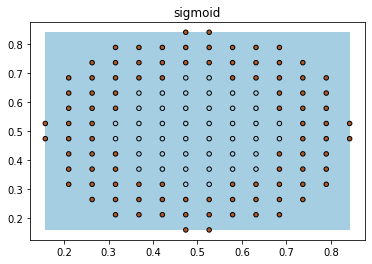


For model = sigmoid with param: {'gamma': 20}
Training Accuracy = 0.6857142857142857


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
../../../machine_learning_tools/visualizations_ml.py:325: UserWarning: No contour levels were found within the data range.
  linestyles=['--', '-', '--'], levels=[-.5, 0, .5])


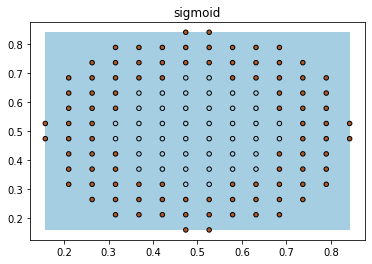

In [17]:
test_kernel_performance(
    X = X_circles,
    y = y_circles
)



For model = linear with param: {}
Training Accuracy = 0.895


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


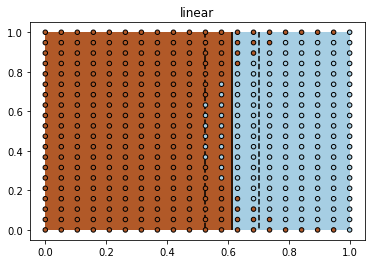


For model = poly with param: {'degree': 2}
Training Accuracy = 0.955


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


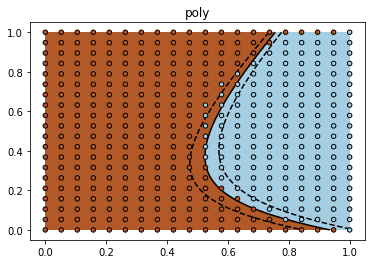


For model = poly with param: {'degree': 3}
Training Accuracy = 0.9625


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


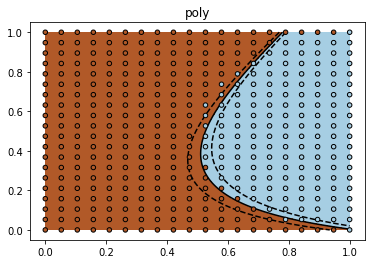


For model = poly with param: {'degree': 5}
Training Accuracy = 0.95


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


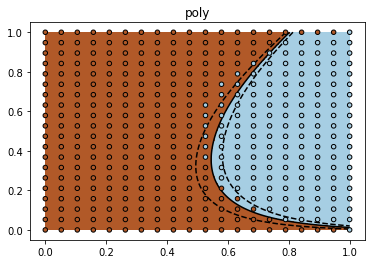


For model = poly with param: {'degree': 7}
Training Accuracy = 0.9275


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


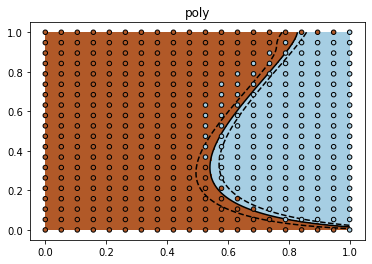


For model = rbf with param: {'gamma': 2}
Training Accuracy = 0.98


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


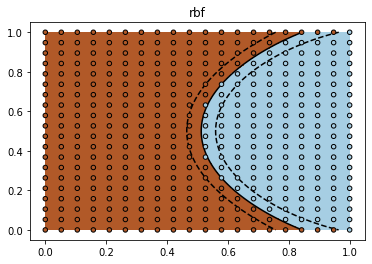


For model = rbf with param: {'gamma': 10}
Training Accuracy = 0.99


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


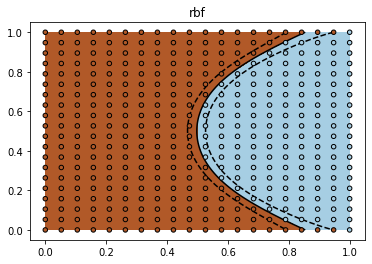


For model = rbf with param: {'gamma': 20}
Training Accuracy = 0.99


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


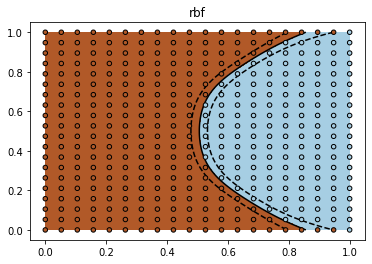


For model = sigmoid with param: {'gamma': 2}
Training Accuracy = 0.5625


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


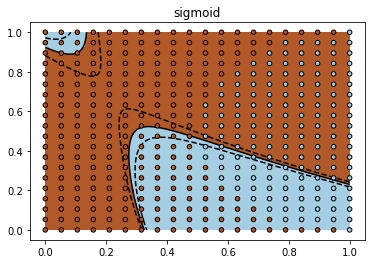


For model = sigmoid with param: {'gamma': 10}
Training Accuracy = 0.325


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


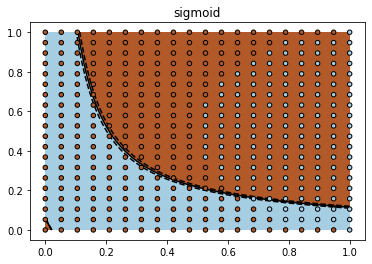


For model = sigmoid with param: {'gamma': 20}
Training Accuracy = 0.3425


../../../machine_learning_tools/visualizations_ml.py:323: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


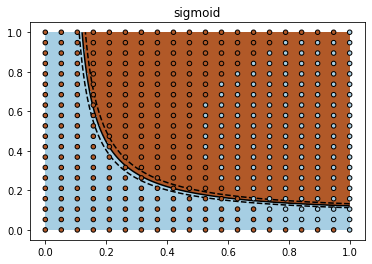

In [18]:
test_kernel_performance(
    X = X_dome,
    y = y_dome
)
